# Filter and prepare Alaska Field Database

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
alaska_csv_db = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Annual_Fuel_Composition/Tundra_field_database/Tundra_field_database_V2-20230327.csv'

In [3]:
alaska_csv_df = pd.read_csv(alaska_csv_db)
alaska_csv_df.head()

/explore/nobackup/people/jacaraba/.nccstmp/ipykernel_2109631/3131096190.py:1: DtypeWarning: Columns (6,31) have mixed types. Specify dtype option on import or set low_memory=False.
  alaska_csv_df = pd.read_csv(alaska_csv_db)


,PLOT_ID,DATASET_ID,DATASET_NAME,LATITUDE,LONGITUDE,DATE,PLOT_ORIGINAL_ID,SURF_TEMP_C,SOIL_TEMP_10CM_C,PH,...,YR_DATA,BURNED_STATUS,FREQ_PRE,YR_LFIRE,N_YR_LFIRE,DNBR,ALL_FIRE_YRS,YR_NFIRE,YRS_NFIRE,FREQ_TOTAL
0,1,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07536,-159.38567,20180810,2018_010A,2.6,-999,-999,...,2018,Burned,1,1985,33,-999,1985,-999,-999,1
1,2,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07319,-159.38965,20180810,2018_011A,2.6,-999,-999,...,2018,Burned,1,1985,33,-999,1985,-999,-999,1
2,3,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07574,-159.39638,20180810,2018_012A,2.1,-999,-999,...,2018,Burned,1,1985,33,-999,1985,-999,-999,1
3,4,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07393,-159.39633,20180810,2018_016A,2.8,-999,-999,...,2018,Burned,1,1985,33,-999,1985,-999,-999,1
4,5,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07742,-159.38846,20180810,2018_017A,2.8,-999,-999,...,2018,Burned,1,1985,33,-999,1985,-999,-999,1


In [4]:
alaska_csv_df.columns

Index(['PLOT_ID', 'DATASET_ID', 'DATASET_NAME', 'LATITUDE', 'LONGITUDE',
       'DATE', 'PLOT_ORIGINAL_ID', 'SURF_TEMP_C', 'SOIL_TEMP_10CM_C', 'PH',
       'WATER_TABLE_CM', 'SOIL_MOIST_%', 'ALT_MEAN_CM', 'ORG_SOIL_DEPTH_CM',
       'LAI_MEAN', 'SHRUB_HEIGHT_CM', 'STEM_COUNT', 'MOSS_COVER_%',
       'LICHEN_COVER_%', 'GRAMINOID_COVER_%', 'FORB_COVER_%', 'SHRUB_COVER_%',
       'BARE_COVER_%', 'LITTER_COVER_%', 'HARV_BIO_G/M^2', 'YR_DATA',
       'BURNED_STATUS', 'FREQ_PRE', 'YR_LFIRE', 'N_YR_LFIRE', 'DNBR',
       'ALL_FIRE_YRS', 'YR_NFIRE', 'YRS_NFIRE', 'FREQ_TOTAL'],
      dtype='object')

In [5]:
alaska_csv_df['MOSS_COVER_%'].unique()

array([-999,   10,    3,   15,    5,    1,    2,   30,   25,   20,    0,
         11,    4,    9,   60,   12,   35,   40,   39,   42,   38,   23,
         37,   33,   28,   32,   26,   50,   14,   16,   18,   22,    7,
         17,   19,   13,    6,    8,   21,   27,   24,   36,   34,   31,
         95,   80,   70,   55,   90,   45,   85,   75,   65,   67,   43,
         88,   98,   64,   63,   56,   72,   69,   52,   54,   59,   51,
         46,   44,   41,   74,   49,   66,   71,   61,   53,   94,   57,
         48,   76,   62,   68,   29,   58,   81,   91,   86,   82,  100,
        103,   87,   83,   73,   84,   96,   78])

In [6]:
alaska_csv_df['LICHEN_COVER_%'].unique()

array([-999,    5,    3,    0,    2,   10,    1,   15,   20,   30,   25,
         60,    6,    8,   13,   12,    4,   14,   21,    7,   18,   11,
         16,   19,   17,   22,   53,   48,   46,    9,   40,   85,   65,
         70,   35,   55,   95,   75,   50,   45,   44,   38,   41,   26,
         32,   24,   36,   29,   28,   93,   80,   52,   42,   31,   34,
         59,   33,   71,   37,   27,   51,   23,   66,   61,   62,   43,
         39,   49])

In [7]:
alaska_csv_df['GRAMINOID_COVER_%'].unique()

array([  55,   30,    2,   50,   60,   95,   87, -999,   65,   59,   45,
         48,   40,   37,   70,   75,   67,   73,   17,   15,   10,   53,
         52,   58,   28,   54,    5,   56,   57,   64,   63,   62,   14,
         43,   35,   44,   39,   51,   18,   49,   36,   42,   68,   34,
         20,    1,   23,   38,   80,   81,   85,   97,   32,   33,   25,
         47,   12,   31,   16,   29,   27,   26,   22,   13,   11,   24,
         19,    0,    9,    7,    3,    8,    4,   46,    6,   72,   21,
         90,   41,   82,   78,  100,   69,   74,   91,   86,   66,   71,
         89,   76,   96,   93,   84,   83,   79,   92,   98,   88,   61,
        119,  129,  106,  113,  122,   77,  102,  134,  105,  112])

In [8]:
alaska_csv_df['FORB_COVER_%'].unique()

array([-999,    0,    1,    2,    4,    3,    8,   20,    6,    7,    5,
         37,    9,   10,   16,   13,   11,   17,   15,   22,   12,   18,
         29,   30,   40,   90,   75,   60,   25,   35,   50,   80,   70,
         45,   59,   32,   21,   85,   23,   39,   91,   82,   52,   14,
         61,   65,  100,   36,   27,   43,   48,   38,   24,   72,   55,
         41,   42,   47,   28,   19,   46,   26])

In [9]:
alaska_csv_df['SHRUB_COVER_%'].unique()

array([  45,   70,   98,   50,   35,    3,   40,   10, -999,   25,   37,
         30,   60,   43,   20,   80,   65,   49,   29,    5,   15,   33,
         64,   55,   52,   85,   19,    8,   14,    2,    4,   32,    7,
         38,   28,   34,   47,   39,   48,   26,   23,   22,   42,   36,
         16,   31,   18,   21,   27,   24,    0,   12,    6,    1,   61,
         41,   53,   51,    9,   44,   11,   56,   17,   46,   63,   82,
         62,   13,   79,   67,   72,   75,   57,   83,   90,  100,   66,
         95,   96,   78,   86,   74,   92,   58,   81,   76,   68,   97,
         69,   73,   77,   54,   71,   94,   91,   59,   88])

In [10]:
alaska_csv_df['BARE_COVER_%'].unique()

array([-999,    1,    0,    7,   14,    5,   22,   21,   17,   15,   12,
          8,   10,   18,   35,   28,   42,   13,   24,   20,   26,   11,
         83,   39,    3,    6,   74,   99,    4,   80,   40,   56,  100,
         82,   60,   55,   76,   68,   41,   33,   65,   49,   63,   25,
         52,    9,    2,   88,   96,   66,   94,   73,   62,   70,   50,
         90,   30,   32,   45,   85,   95,   75,   97,   98,   38,   37,
         93,   86,   44,   92,   89,   48,   16,   19,   47,   71,   57])

In [11]:
alaska_csv_df['LITTER_COVER_%'].unique()

array([-999,    1,    0,    2,    3,    4,    6,    8,   18,   58,   32,
         14,   60,    9,   41,   69,   38,   36,   52,   43,   59,   28,
         40,   37,   54,   34,   30,   27,   50,   49,   35,   47,   33,
         66,   68,   11,   25,   19,   29,   12,   44,   39,   31,   46,
         26,   23,   17,   42,   57,   51,   20,   45,   21,   16,    5,
         15,    7,   22,   10,   48,   24,   13,   56,   70,   90,   95,
         80,   55,   65,   75,   85,   98,   99,   88,   61,   83,   76,
         87,   71,   63])

In [12]:
alaska_csv_df['LATITUDE'].head()

0    68.07536
1    68.07319
2    68.07574
3    68.07393
4    68.07742
Name: LATITUDE, dtype: float64

In [13]:
gdf = gpd.GeoDataFrame(
    alaska_csv_df, geometry=gpd.points_from_xy(alaska_csv_df.LONGITUDE, alaska_csv_df.LATITUDE))
gdf = gdf.set_crs('EPSG:4326')
gdf.head()

,PLOT_ID,DATASET_ID,DATASET_NAME,LATITUDE,LONGITUDE,DATE,PLOT_ORIGINAL_ID,SURF_TEMP_C,SOIL_TEMP_10CM_C,PH,...,BURNED_STATUS,FREQ_PRE,YR_LFIRE,N_YR_LFIRE,DNBR,ALL_FIRE_YRS,YR_NFIRE,YRS_NFIRE,FREQ_TOTAL,geometry
0,1,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07536,-159.38567,20180810,2018_010A,2.6,-999,-999,...,Burned,1,1985,33,-999,1985,-999,-999,1,POINT (-159.38567 68.07536)
1,2,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07319,-159.38965,20180810,2018_011A,2.6,-999,-999,...,Burned,1,1985,33,-999,1985,-999,-999,1,POINT (-159.38965 68.07319)
2,3,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07574,-159.39638,20180810,2018_012A,2.1,-999,-999,...,Burned,1,1985,33,-999,1985,-999,-999,1,POINT (-159.39638 68.07574)
3,4,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07393,-159.39633,20180810,2018_016A,2.8,-999,-999,...,Burned,1,1985,33,-999,1985,-999,-999,1,POINT (-159.39633 68.07393)
4,5,Loboda_2022,"Burned & Unburned Field Site Data, Noatak, Sew...",68.07742,-159.38846,20180810,2018_017A,2.8,-999,-999,...,Burned,1,1985,33,-999,1985,-999,-999,1,POINT (-159.38846 68.07742)


<Axes: >

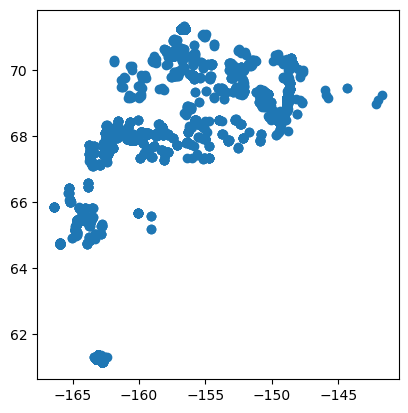

In [14]:
gdf.plot()

In [15]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf = gdf.to_crs('EPSG:3338')
gdf.crs

<Derived Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
tundra_shapefile = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Geometries/Alaskan_Tundra/Alaska_tundra_merged.shp'
tundra_shape = gpd.read_file(tundra_shapefile)
tundra_shape

,AREA,PERIMETER,ALASKA3_,ALASKA3_ID,ILUM,ZONE_,PERCENTLAK,CALCAREOUS,SOIL,BEDROCK,...,LAKEPIXCAT,COUNTRY,LANDSCAPE,PHYSIOG,FINAL,VEG,COMM,Shape_Leng,Shape_Area,geometry
0,56720400.0,34777.1,2,3379,200,4,3,0,71,50,...,3,7,4,13,10,13.01,W2.2,34901.097484,5.713710e+07,"MULTIPOLYGON (((-388058.140 992814.890, -39036..."


In [18]:
#gdf.to_file(Path(alaska_csv_db).with_suffix('.gpkg'), driver='GPKG', layer='field_data')

## Plot

In [19]:
gdf.shape

(197830, 36)

In [20]:
gdf = gdf.clip(tundra_shape)
gdf.shape

(197813, 36)

MOSS_COVER_% points (1818, 2)
LICHEN_COVER_% points (2144, 2)
GRAMINOID_COVER_% points (2363, 2)
FORB_COVER_% points (2062, 2)
SHRUB_COVER_% points (2435, 2)
BARE_COVER_% points (1682, 2)
LITTER_COVER_% points (1199, 2)


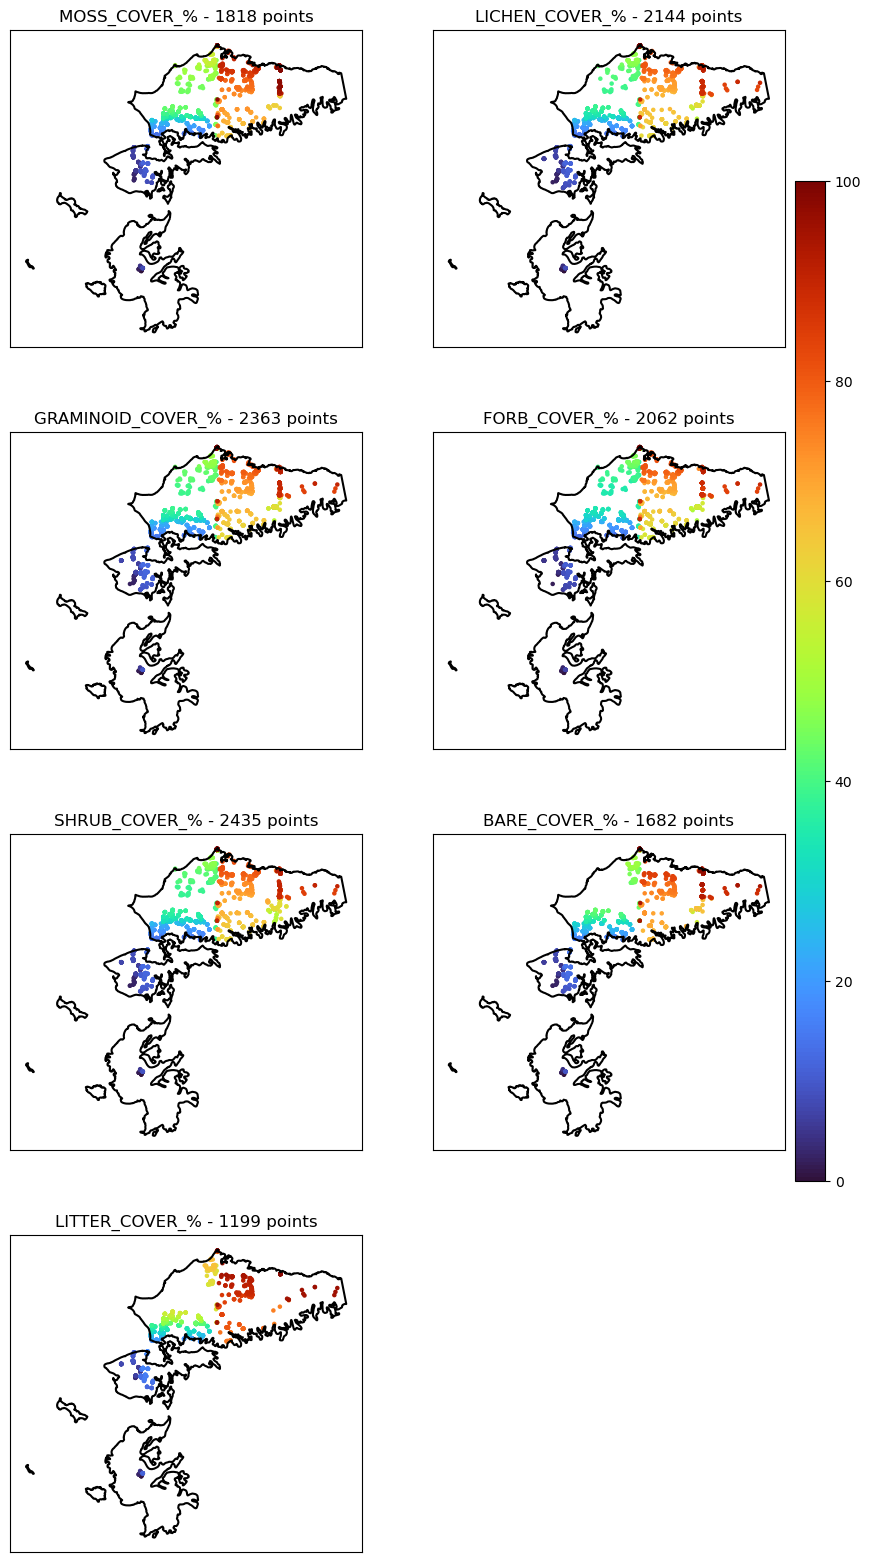

<Figure size 640x480 with 0 Axes>

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

fuel_types = [
    'MOSS_COVER_%', 'LICHEN_COVER_%', 'GRAMINOID_COVER_%', 'FORB_COVER_%',
    'SHRUB_COVER_%','BARE_COVER_%', 'LITTER_COVER_%'
]

fig, axes = plt.subplots(4, 2, figsize=(10, 20))

norm = mpl.colors.Normalize(vmin=5, vmax=10)

for ax, fuel in zip(axes.flat[:-1], fuel_types):
    
    #print(fuel)
    
    tundra_shape.boundary.plot(ax=ax, color="black")
    
    fuel_xx = gdf[gdf[fuel] != -999]
    mfuel_xx = fuel_xx[[fuel, 'geometry']]
    print(fuel, "points", mfuel_xx.shape)
    
    
    im = mfuel_xx.plot(ax=ax, markersize=5, vmin=0, vmax=100, cmap='turbo', legend=True)
    ax.set_title(f'{fuel} - {mfuel_xx.shape[0]} points')
    ax.set_yticks([])
    ax.set_xticks([])

cb1 = mpl.colorbar.ColorbarBase(axes.flat[-1], cmap='turbo',
                            norm=norm,
                            orientation='horizontal')
# add colorbar
fig = axes.flat[-1].get_figure()
cax = fig.add_axes([.91, 0.3, 0.03, 0.5])
sm = plt.cm.ScalarMappable(cmap='turbo', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
fig.colorbar(sm, cax=cax)
fig.delaxes(axes[3][1])

plt.show()
plt.tight_layout()
fig.savefig('fuel_types_2.png')

In [22]:
moss = gdf[gdf['MOSS_COVER_%'] != -999]
moss['MOSS_COVER_%'].min(), moss['MOSS_COVER_%'].max()

(0, 103)

<Axes: >

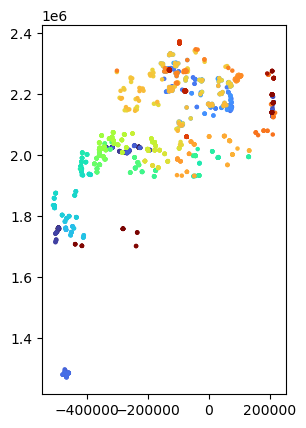

In [28]:
moss[['MOSS_COVER_%', 'geometry']].plot(markersize=5, vmin=0, vmax=100, cmap='turbo', legend=True)

In [23]:
# fuel_types = [
#    'MOSS_COVER_%', 'LICHEN_COVER_%', 'GRAMINOID_COVER_%', 'FORB_COVER_%',
#    'SHRUB_COVER_%','BARE_COVER_%', 'LITTER_COVER_%'
#]
gdf[(gdf['GRAMINOID_COVER_%'] >= 80) & (gdf['SHRUB_COVER_%'] >= 80)][['GRAMINOID_COVER_%', 'SHRUB_COVER_%']]

,GRAMINOID_COVER_%,SHRUB_COVER_%
195379,80,97
195378,85,86
195377,85,100


In [37]:
gdf[(gdf['LITTER_COVER_%'] >= 80) & (gdf['GRAMINOID_COVER_%'] >= 80)][['LITTER_COVER_%', 'GRAMINOID_COVER_%']]

,LITTER_COVER_%,GRAMINOID_COVER_%
194305,80,90
194178,80,90


In [ ]:
gdf